pyspedasをインストール

In [1]:
%pip install pyspedas
%matplotlib widget

  Using cached pyspedas-1.4.37-py3-none-any.whl (1.1 MB)
  Using cached astropy-5.3-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (10.1 MB)
  Using cached cdflib-1.0.4-py3-none-any.whl (72 kB)
  Using cached netCDF4-1.6.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.4 MB)
  Using cached PyWavelets-1.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.8 MB)
  Using cached pytplot_mpl_temp-2.1.39-py3-none-any.whl (1.8 MB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached cdasws-1.7.42-py3-none-any.whl (38 kB)
  Using cached geopack-1.0.10-py3-none-any.whl (114 kB)
  Using cached viresclient-0.11.1-py3-none-any.whl (96 kB)
  Using cached hapiclient-0.2.5-py3-none-any.whl
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached pandas-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manyli

pyspedasモジュールをインストール

In [2]:
import pyspedas

trで時間を指定してmgfデータをロード

In [3]:
tr = ['2017-03-27', '2017-03-28']

from pyspedas.erg import mgf
mgf(trange = tr)

15-Jun-23 18:21:25: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
15-Jun-23 18:21:26: Downloading https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf to erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
15-Jun-23 18:21:27: Download complete: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
15-Jun-23 18:21:27: /home/jackkooki/Document/arase_data_user_tohoku/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

15-Jun-23 18:21:27: /home/jackkooki/Document/arase_data_user_tohoku/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar i

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_mgf_l2_epoch_8sec',
 'erg_mgf_l2_mag_8sec_dsi',
 'erg_mgf_l2_mag_8sec_gse',
 'erg_mgf_l2_mag_8sec_gsm',
 'erg_mgf_l2_mag_8sec_sm',
 'erg_mgf_l2_magt_8sec',
 'erg_mgf_l2_rmsd_8sec_dsi',
 'erg_mgf_l2_rmsd_8sec_gse',
 'erg_mgf_l2_rmsd_8sec_gsm',
 'erg_mgf_l2_rmsd_8sec_sm',
 'erg_mgf_l2_rmsd_8sec',
 'erg_mgf_l2_n_rmsd_8sec',
 'erg_mgf_l2_dyn_rng_8sec',
 'erg_mgf_l2_quality_8sec',
 'erg_mgf_l2_quality_8sec_gc',
 'erg_mgf_l2_igrf_8sec_dsi',
 'erg_mgf_l2_igrf_8sec_gse',
 'erg_mgf_l2_igrf_8sec_gsm',
 'erg_mgf_l2_igrf_8sec_sm']

その場のサイクロトロン周波数を計算してみよう

まずは必要なモジュールをインストール

In [4]:
import numpy as np #計算したいときはnumpyをimport
import pytplot #pytplotはpythonで時間プロット
import plasma_prams as pp #定数をまとめたモジュール

サイクロトロン周波数は\
$f_{ce}=\frac{e\cdot B}{m_e}$\
で計算できる。電荷素量や電子質量はplasma_paramsに入っている。\
磁場はmgfデータから持ってきたい。

データを数値として読み込むには主に二つの方法がある

一つ目はpytplotモジュールののdata_quantsを使う方法

In [11]:
B = pytplot.data_quants['erg_mgf_l2_magt_8sec']*1e-9 #磁場データを取得

ちなみに、araseデータはxarrayという座標軸名を定義できるデータに入っている\
磁場は一つの時間に対して一つの値が入っているので'time'という座標軸が存在している

In [6]:
B

<xarray.DataArray 'erg_mgf_l2_magt_8sec' (time: 10812)>
array([349.97209299, 349.32177136, 348.69561499, ..., 209.22848032,
       209.46040549, 209.87081885])
Coordinates:
  * time     (time) datetime64[ns] 2017-03-26T23:59:58.621162 ... 2017-03-27T...
Attributes:
    CDF:           {'VATT': {'FIELDNAM': 'Bt', 'CATDESC': '8 sec resolution t...
    data_att:      {'coord_sys': '', 'units': 'nT', 'depend_1_units': 'nT', '...
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

もう一つの方法はget_dataを使う方法\
この方法だと単にarrayとしてデータを取り出せる\
timesとyのarray

In [10]:
B_array = pytplot.get_data('erg_mgf_l2_magt_8sec')

In [11]:
B_array

variable(times=array([1.49057280e+09, 1.49057280e+09, 1.49057281e+09, ...,
       1.49065917e+09, 1.49065918e+09, 1.49065919e+09]), y=array([349.97209299, 349.32177136, 348.69561499, ..., 209.22848032,
       209.46040549, 209.87081885]))

それぞれのデータをいじってみる

In [12]:
B['time']

<xarray.DataArray 'time' (time: 10812)>
array(['2017-03-26T23:59:58.621162000', '2017-03-27T00:00:01.713156000',
       '2017-03-27T00:00:09.708524000', ..., '2017-03-27T23:59:29.580020000',
       '2017-03-27T23:59:37.559818000', '2017-03-27T23:59:45.555189000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2017-03-26T23:59:58.621162 ... 2017-03-27T...

In [13]:
B[0]

<xarray.DataArray 'erg_mgf_l2_magt_8sec' ()>
array(349.97209299)
Coordinates:
    time     datetime64[ns] 2017-03-26T23:59:58.621162
Attributes:
    CDF:           {'VATT': {'FIELDNAM': 'Bt', 'CATDESC': '8 sec resolution t...
    data_att:      {'coord_sys': '', 'units': 'nT', 'depend_1_units': 'nT', '...
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

In [19]:
B_array[:][0] #B_arrayの0番目の要素=time

array([1.49057280e+09, 1.49057280e+09, 1.49057281e+09, ...,
       1.49065917e+09, 1.49065918e+09, 1.49065919e+09])

In [20]:
B_array[:][1] #B_arrayの1番目の要素=B

array([349.97209299, 349.32177136, 348.69561499, ..., 209.22848032,
       209.46040549, 209.87081885])

In [25]:
B_array[0][0]

1490572798.621162

In [27]:
B_array[0][1]

1490572801.713156

In [26]:
B_array[1][0]

349.97209298515725

In [28]:
B_array[1][1]

349.32177136306717

実際に計算してみよう

In [12]:
fc = (pp.Q*B/pp.ME)/2/np.pi

データを格納してプロット

In [13]:
pytplot.store_data('fc', data={'x': B['time'], 'y': fc})

True

15-Jun-23 18:24:32: /home/jackkooki/Document/arase_data_user_tohoku/.venv/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:501: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)



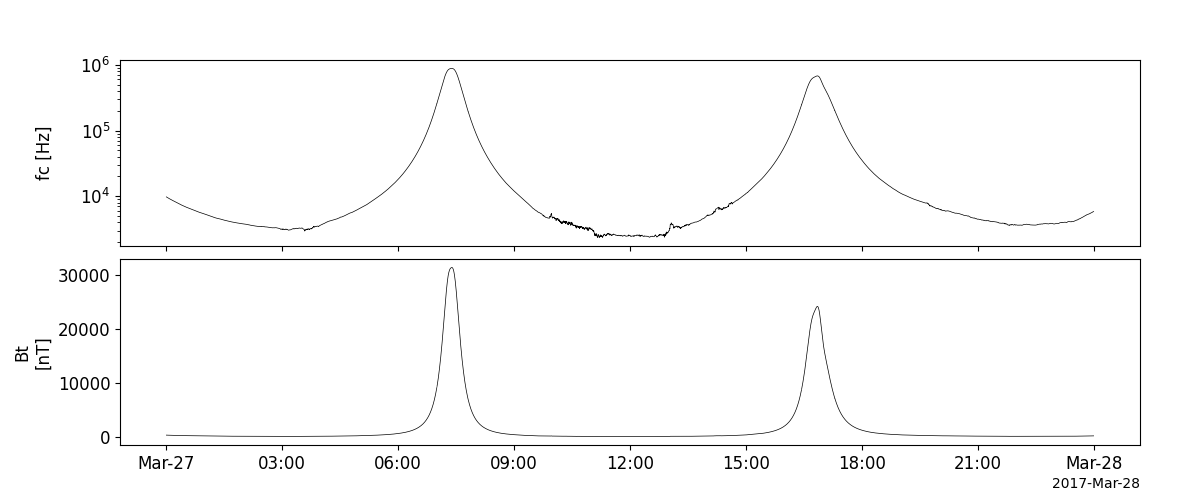

In [16]:
pytplot.options('fc', opt_dict={'ytitle': 'fc [Hz]', 'ylog': True})
pytplot.tplot(['fc','erg_mgf_l2_magt_8sec'])